In [ ]:
import numpy as np
from tensorflow import keras
import pandas as pd
import os

In [ ]:
data = open('tt.txt').read()


corpus = data.lower().split("\n")
corpus

['eighteen years eighteen years',
 'she got one of your kids got you for eighteen years',
 'i know somebody paying child support for one of his kids',
 'his baby mama car and crib is bigger than his',
 'you will see him on tv any given sunday',
 'win the super bowl and drive off in a hyundai',
 'she was supposed to buy your shorty tyco with your money',
 'she went to the doctor got lipo with your money',
 'she walking around looking like michael with your money',
 'shouldve got that insured geico for your money',
 'if you aint no punk',
 'holla we want prenup we want prenup yeah',
 'its something that you need to have',
 'cause when she leave your ass she gon leave with half',
 'eighteen years eighteen years',
 'and on the the birthday he found out it wasnt his',
 'now i aint saying you a gold digger you got needs',
 'you dont want a dude to smoke but he cant buy weed',
 'you go out to eat and he cant pay yall cant leave',
 'theres dishes in the back he gotta roll up your sleeves',
 'b

In [ ]:
with open(file, encoding='utf-8') as f:
    Corpus = f.readlines()  
Corpus = ' '.join(Corpus).lower().split('\n')

Corpus

NameError: name 'file' is not defined

In [ ]:
print('Corpus Length:', len(corpus))

Corpus Length: 6192


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
totalWords = len(tokenizer.word_index) + 1
print(totalWords)

6141


In [ ]:
sequences = []
for line in corpus:
    tokenList = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenList)):
        ngramSequence = tokenList[:i+1]
        sequences.append(ngramSequence)

In [ ]:
sequences[:5]

[[928, 240], [928, 240, 928], [928, 240, 928, 240], [22, 23], [22, 23, 76]]

In [ ]:
def padSequences(sequences):
    maxSequenceLen = max([len(seq) for seq in sequences])
    sequences = np.array(pad_sequences(sequences, maxlen=maxSequenceLen, padding='pre'))
    
    predictors, label = sequences[:,:-1], sequences[:,-1]
    label = to_categorical(label, num_classes=totalWords)
    return predictors, label, maxSequenceLen

predictors, label, maxSequenceLen = padSequences(sequences)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(totalWords, 64, input_length=maxSequenceLen - 1))
model.add(Dropout(0.25))
model.add(layers.LSTM(128))
model.add(layers.Dense(totalWords, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 64)            393024    
_________________________________________________________________
dropout (Dropout)            (None, 18, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 6141)              792189    
Total params: 1,284,029
Trainable params: 1,284,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(predictors, label, epochs=50, 
                    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)])

Epoch 1/50
 861/1413 [=================>............] - ETA: 21s - loss: 7.0834 - accuracy: 0.0421

1413/1413 [==============================] - 60s 42ms/step - loss: 1.8740 - accuracy: 0.5631


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Loss/Accuracy of the Language Model')

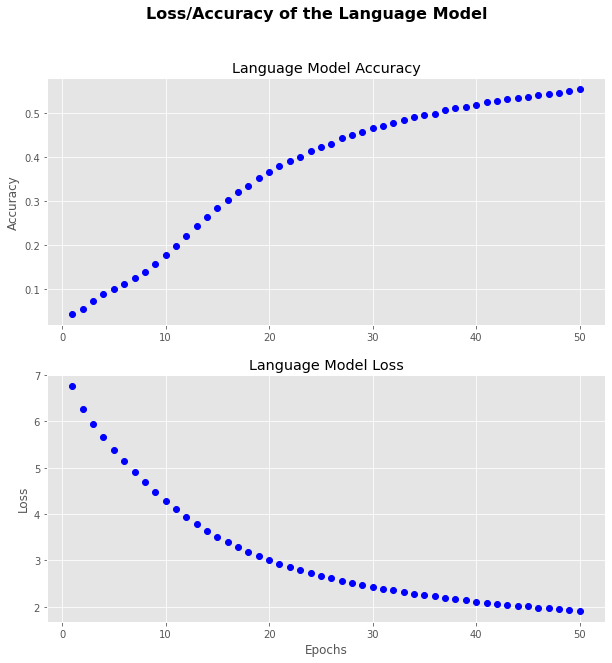

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Accuracy')
plot = ax2.plot(epochs, loss, 'bo', label='Loss')
ax1.set(title='Language Model Accuracy', ylabel='Accuracy')
ax2.set(title='Language Model Loss', xlabel='Epochs', ylabel='Loss')

fig.suptitle('Loss/Accuracy of the Language Model', fontsize=16, fontweight = 'bold')

In [ ]:
def generateText(seed):   #A text seed is provided
    for wordLength in range(200):   #Generates a text with a range of word length
        tokenList = tokenizer.texts_to_sequences([seed])[0]  #Turns the seed into sequences
        tokenList = pad_sequences([tokenList], maxlen=maxSequenceLen - 1, padding='pre')
        predicted = model.predict_classes(tokenList, verbose=0) #Predicts the next sequence(generated
        outputWord = " "                                         #text)  
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                outputWord = word
                break
        seed += " " + outputWord     #Returns the seed plus generated text
    return seed

In [ ]:
generateText('Honey')

/shared-libs/python3.8/py/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Honey wanna see the private jets flying over you think its just too thing on us with someone it be cold down us cold slow hands down out of pain realize we believe up handed him fathers wilding mr west sister modelin hands down boy do it rain do me basics fucking wired me realize it cheesecake cool gotta have at least at least it is no lights a new bag around you know how granny do it huh huh it feel to me think i know how do you do it off the lie to think you know hes in something realize you ball a neo beat me feel it good with me soul soul to waffle nigga believe to me low nigga crazy huh ha do it then it aint it too many blues you dream but you do it right you should do it right now you playing the top out of our mouth realize out of the top aint next week want my olympics lace lace feels like asics asics kill cool yo mouth yo judgment rapper pretty inch turns it one song or know me you know how do do aight nigga with us out of'

In [ ]:
generateText('Bumble bee')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Bumble bee a doctor would be baffled at how my heart conveniently decides to beat faster or slower – depending on whether i’m thinking about you or not xoxo if these sample love letters for her can give your love or the continue to push all the'

In [ ]:
generateText('mi Love')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'mi Love can never be measured it can only be felt you have painted my life with the colors of heaven i don’t want anything else as long as your love is with me forever now i love you so much honey and i just wanted to'

In [ ]:
generateText('my Heartbeat')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'my Heartbeat you make me feel happy and i have ever known before i met and hard i get this one else can always be my wish it’s let you it’s always there for me i love you darling when i wake up a lot when i'

In [ ]:
generateText('Loofu mi')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Loofu mi i love you more than i did yesterday but not more than i will tomorrow ❤ on for a thousand will more i love you more than every day could always mean more than the most heartfelt growing in my dreams and i am ready'

In [ ]:
model.save('./rosaLove.h5')
model = keras.models.load_model('./rosaLove.h5')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1847666d-1024-4ccd-aa0a-538596f06c6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>